### Loading and exploring the data

In [1]:
# Loading the dataset and exploring it
import pandas as pd
tweets_df = pd.read_csv('elon_musk_tweets.csv')
tweets_df.head()
tweets_df.isnull().sum()
# the main focus is on the 'text' column for sentiment analysis

id                     0
user_name              0
user_location       4854
user_description    4482
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5902
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

### Text Preprocessing

In [2]:
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already installed
nltk.download('stopwords')

# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions (@username) and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove punctuations and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize the text
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

# Apply the preprocessing to the 'text' column
tweets_df['clean_text'] = tweets_df['text'].apply(preprocess_text)

# Display the cleaned text
tweets_df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,@BillyM2k I find the gold toe sock – inevitabl...,find gold toe sock inevitably kilter amp washe...
1,"Sock Con, the conference for socks",sock con conference socks
2,Always something new for the magazine cover an...,always something new magazine cover articles p...
3,@ExplainThisBob This guy gets it,guy gets
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...


### Feature Extraction using TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 words

# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(tweets_df['clean_text'])

# Display the TF-IDF features (Sparse Matrix format)
X_tfidf.shape


(5904, 5000)

### Sentiment Labeling and Train-Test Split
Since we don’t have labeled data, we’ll randomly assign "positive" and "negative" sentiments to simulate the sentiment analysis task.

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate a sentiment label (randomly assigning positive/negative sentiment)
np.random.seed(42)  # For reproducibility
tweets_df['sentiment'] = np.random.choice(['positive', 'negative'], size=len(tweets_df))
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, tweets_df['sentiment'], test_size=0.2, random_state=42)

### Modeling with Logistic Regression
Logistic Regression is a simple yet effective model for binary classification problems like sentiment analysis.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.506350550381033
Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.54      0.51       561
    positive       0.53      0.48      0.50       620

    accuracy                           0.51      1181
   macro avg       0.51      0.51      0.51      1181
weighted avg       0.51      0.51      0.51      1181



### Modeling with Naive Bayes
Naive Bayes works well for text classification and is often used for sentiment analysis.

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, nb_pred)}")
print(f"Classification Report:\n{classification_report(y_test, nb_pred)}")

Naive Bayes Performance:
Accuracy: 0.5139712108382727
Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.54      0.51       561
    positive       0.54      0.49      0.52       620

    accuracy                           0.51      1181
   macro avg       0.52      0.52      0.51      1181
weighted avg       0.52      0.51      0.51      1181



### Modeling with Support Vector Machine (SVM)
SVM is another powerful model used in text classification. It’s particularly effective in high-dimensional spaces like text data.

In [7]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f"Classification Report:\n{classification_report(y_test, svm_pred)}")

SVM Performance:
Accuracy: 0.5046570702794242
Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.52      0.50       561
    positive       0.53      0.49      0.51       620

    accuracy                           0.50      1181
   macro avg       0.51      0.51      0.50      1181
weighted avg       0.51      0.50      0.50      1181



### Modeling with Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their results for improved accuracy and robustness.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"Classification Report:\n{classification_report(y_test, rf_pred)}")

Random Forest Performance:
Accuracy: 0.519051651143099
Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.58      0.54       561
    positive       0.55      0.46      0.50       620

    accuracy                           0.52      1181
   macro avg       0.52      0.52      0.52      1181
weighted avg       0.52      0.52      0.52      1181



### Model Comparison
Now that we've tested multiple models, let’s compare their performance using accuracy as the main metric.

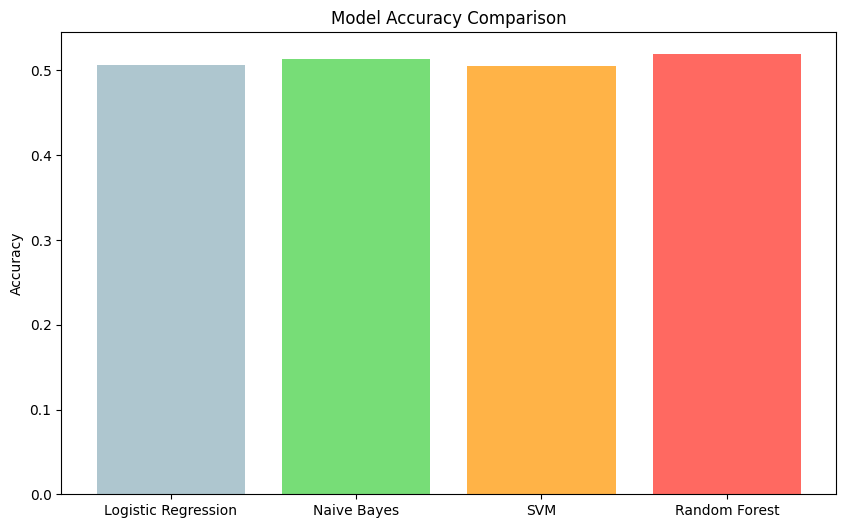

In [9]:
import matplotlib.pyplot as plt

# Store model names and accuracy scores
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred)
]

# Define pastel colors
pastel_colors = ['#AEC6CF', '#77DD77', '#FFB347', '#FF6961'] 

# Plot model accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=pastel_colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Model Evaluation - Confusion Matrix
Visualize the performance of the models using a confusion matrix.

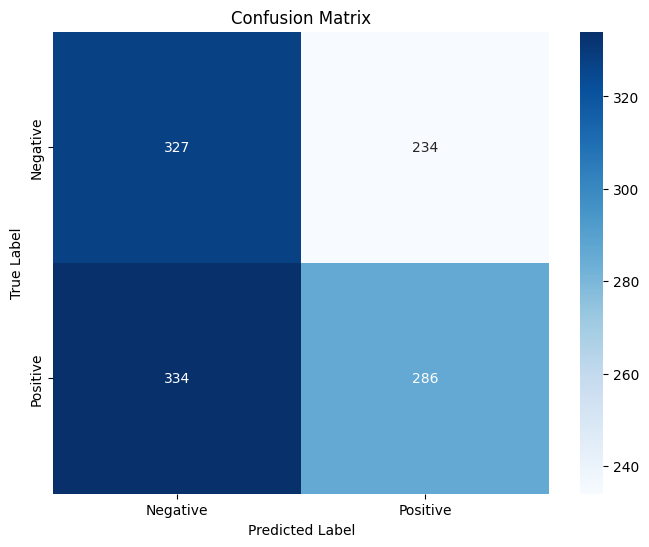

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the Random Forest (can replace with other models)
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Conclusion
In this project, we performed sentiment analysis on Elon Musk's tweets using several machine learning models:

Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Random Forest
##### Model Performance:
The models achieved accuracy between 50.47% and 51.91%, with Random Forest performing the best.
The confusion matrix indicated a significant number of misclassifications between positive and negative sentiments, suggesting further improvements are needed.
##### Potential Improvements:
1. Hyperparameter Tuning: Optimizing the Random Forest model with techniques like Grid Search could improve its performance.
2. Handling Class Imbalance: Using techniques like Class Weighting or SMOTE (Synthetic Minority Over-sampling) could help address class imbalance and improve model accuracy.
3. Advanced Models: In the future, models like LSTM or BERT could capture more complex relationships in the data, likely improving sentiment classification accuracy.
4. More Data: Collecting more labeled data could help all models generalize better.
Overall, Random Forest showed the best performance, but addressing class imbalance and exploring more advanced models could lead to even better results.